# **Hybrid model for Stock Prediction and News Analaysis**
**Task by: Sparks Foundation** \
**The Saprks Foundation - GRIP**


> **Name: Anushka Purwar**



In [ ]:
import pandas as pd
import itertools
import numpy as np
import nltk
import re
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from pmdarima import auto_arima
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

# **Sensex Data**

In [ ]:
stock=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_DataScience/GRIP/StockMarket_NewsAnalysis/BSensex.csv")
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


In [ ]:
stock.shape

(252, 7)

In [ ]:
#Cleaning data
print(stock.isnull().sum())
print("\nDuplicates: ")
print(stock.duplicated().sum())

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

Duplicates: 
0


In [ ]:
stock.dropna(inplace=True)
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock.shape

(250, 7)

In [ ]:
stock['Date']=pd.to_datetime(stock.Date)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.6 KB


In [ ]:
print(stock.describe)

<bound method NDFrame.describe of           Date          Open          High           Low         Close  \
0   2019-12-17  41052.359375  41401.648438  41005.179688  41352.171875   
1   2019-12-18  41442.750000  41614.769531  41358.468750  41558.570313   
2   2019-12-19  41571.820313  41719.289063  41456.398438  41673.921875   
3   2019-12-20  41746.199219  41809.960938  41636.109375  41681.539063   
4   2019-12-23  41548.261719  41701.621094  41474.609375  41642.660156   
..         ...           ...           ...           ...           ...   
247 2020-12-11  46060.320313  46309.628906  45706.218750  46099.011719   
248 2020-12-14  46284.699219  46373.339844  45951.531250  46253.460938   
249 2020-12-15  46287.390625  46350.300781  45841.671875  46263.171875   
250 2020-12-16  46573.308594  46704.968750  46402.199219  46666.460938   
251 2020-12-17  46774.320313  46992.570313  46627.601563  46890.339844   

        Adj Close   Volume  
0    41352.171875  19000.0  
1    41558.570313  

In [ ]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
line_plot = px.line(stock, x='Date', y='Close', title='Sensex Closing Price Over Time')
line_plot.update_xaxes(type='category')

In [ ]:
stock['Daily_Return'] = stock['Close'].pct_change()
stock

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,NaN
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,0.004991
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,0.002776
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,0.000183
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,-0.000933
...,...,...,...,...,...,...,...,...
247,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0,0.003027
248,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0,0.003350
249,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0,0.000210
250,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0,0.008717


In [ ]:
stock['Moving_Average_10'] = stock['Close'].rolling(window=10).mean()
stock['Moving_Average_50'] = stock['Close'].rolling(window=50).mean()
stock

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Moving_Average_10,Moving_Average_50
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,NaN,NaN,NaN
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,0.004991,NaN,NaN
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,0.002776,NaN,NaN
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,0.000183,NaN,NaN
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,-0.000933,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
247,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0,0.003027,45233.326953,42105.286250
248,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0,0.003350,45443.701172,42268.996875
249,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0,0.000210,45604.474219,42420.319297
250,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0,0.008717,45809.316406,42574.174531


In [ ]:
def tests(series):
  res=adfuller(series)
  print("ADF Test Results:")
  print(f"ADF Statistics: {res[0]}")
  print(f"n_lags: {res[2]}")
  print(f"p-value: {res[1]}")
  for key,val in res[4].items():
    print(f"Critical values: {key}, {val}")

  if(res[1]>0.05):
    print("Time Series Data is Non Stationary")
  else:
    print("Time Series Data is Stationary")

  print("\nKPSS Test Results:")
  kpssTest=kpss(series,regression='c')
  kpss_output=pd.Series(kpssTest[0:3], index=['Test Statistics','p-value','Lags used'])
  for key,val in kpssTest[3].items():
    kpss_output["Critical Value (%s)"%key]=val

  print(kpss_output)
  if(kpssTest[1]<0.05):
    print("Time Series Data is Non Stationary\n")
  else:
    print("Time Series Data is Stationary\n")

  if res[1]>0.05 and kpssTest[1]<0.05:
    print("Final Result: Time Series data is Non Stationary\n")
  elif(res[1]<0.05 and kpssTest[1]>0.05):
    print("Final Result: Time Series data is Sationary\n")
  elif(res[1]>0.05 and kpssTest[1]>0.05):
    print("Final Result: Time Series data is Trend Stationary\n")
  else:
    print("Final Result: Time Series data is Difference Stationary\n")


In [ ]:
tests(stock['Close'])

ADF Test Results:
ADF Statistics: -0.698285082749831
n_lags: 6
p-value: 0.8471932401708802
Critical values: 1%, -3.4575505077947746
Critical values: 5%, -2.8735087323013526
Critical values: 10%, -2.573148434859185
Time Series Data is Non Stationary

KPSS Test Results:
Test Statistics           0.686712
p-value                   0.014753
Lags used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Time Series Data is Non Stationary

Final Result: Time Series data is Non Stationary



In [ ]:
n=1
stock['diff']=stock['Close'].diff(periods=n)
stock['diff'].dropna()
stock['mean_rolling']=stock['diff'].rolling(window=10).mean()
stock

#stationarity test
series=stock.loc[: , 'Close'].values
series=stock.loc[:, 'diff'].dropna()
print(tests(series))
fig=px.line(stock,x='Date',y=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
fig.show()


ADF Test Results:
ADF Statistics: -5.454643913808471
n_lags: 5
p-value: 2.5980557452673922e-06
Critical values: 1%, -3.4575505077947746
Critical values: 5%, -2.8735087323013526
Critical values: 10%, -2.573148434859185
Time Series Data is Stationary

KPSS Test Results:
Test Statistics          0.488988
p-value                  0.044147
Lags used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Time Series Data is Non Stationary

Final Result: Time Series data is Difference Stationary

None


In [ ]:
#Log transformation
stock['log_trans']=np.log(stock['Close'])

#first differencing
n=1
stock['diff']=stock['log_trans'].diff(periods=n)
stock['diff'].dropna()
stock['mean_rolling']=stock['diff'].rolling(window=n).mean()

#seasonal differencing
n=12
stock['diff1']=stock['mean_rolling'].diff(periods=n)
stock['diff1'].dropna()
stock['seasonal_mean_rolling_diff1']=stock['diff1'].rolling(window=n).mean()
stock

series=stock.loc[:, 'seasonal_mean_rolling_diff1'].dropna()
print(tests(series))
fig=px.line(stock,x='Date',y=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
fig.show()

ADF Test Results:
ADF Statistics: -4.089433035520527
n_lags: 15
p-value: 0.0010082182591065166
Critical values: 1%, -3.461878735881654
Critical values: 5%, -2.875403665910809
Critical values: 10%, -2.574159410430839
Time Series Data is Stationary

KPSS Test Results:
Test Statistics          0.036241
p-value                  0.100000
Lags used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Time Series Data is Stationary

Final Result: Time Series data is Sationary

None


<ipython-input-123-1293b0aabffd>:18: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [ ]:
px.line(stock,x='Date',y=['seasonal_mean_rolling_diff1'])

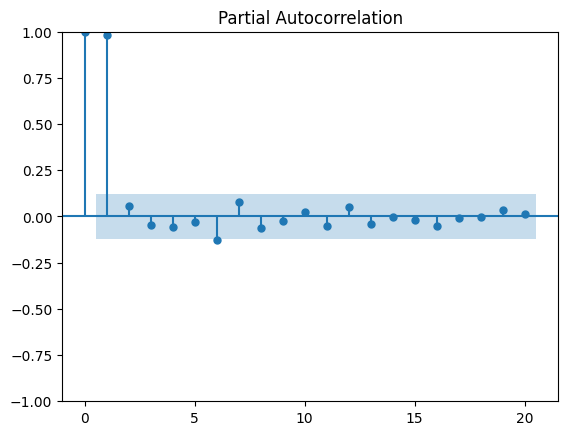

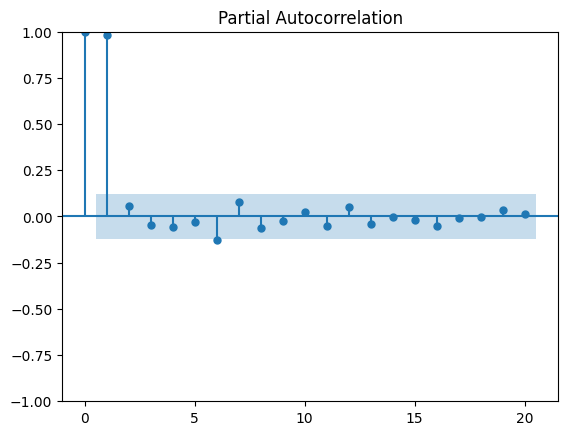

In [ ]:
plot_pacf(stock['Close'],lags=20)

In [ ]:
ma_plot = px.line(stock, x='Date', y=['Moving_Average_10', 'Moving_Average_50'], title='Sensex Moving Averages (10-Day and 50-Day)')
ma_plot.update_xaxes(type='category')

Figure(640x480)
Coefficients: const        782.753815
Close.L1       0.911827
Close.L2       0.129220
Close.L3       0.001817
Close.L4       0.042920
Close.L5       0.079571
Close.L6      -0.327600
Close.L7       0.248177
Close.L8      -0.044228
Close.L9      -0.088295
Close.L10      0.113701
Close.L11     -0.173558
Close.L12      0.114616
Close.L13     -0.029740
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



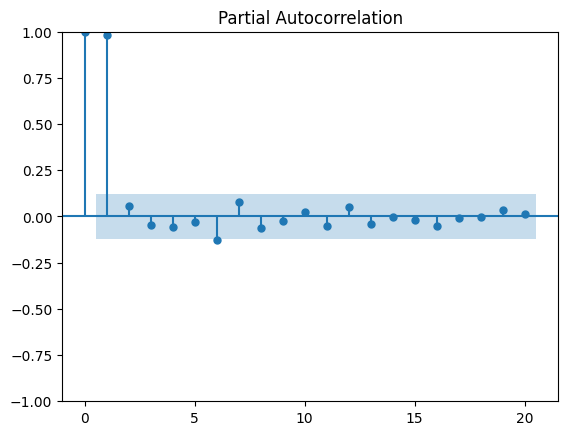

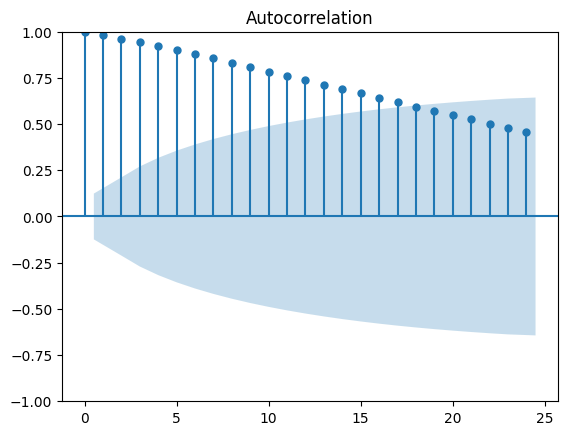

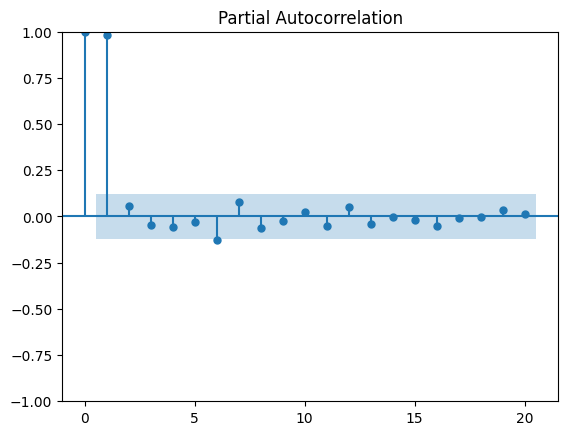

In [ ]:
X = stock["Close"]
train = X[:int(len(X)*0.8)]
test = X[int(len(X)*0.2):]

print(plot_acf(stock['Close']))
model=AutoReg(train,lags=13)
model_fit=model.fit()

print(f"Coefficients: {model_fit.params}")
plot_pacf(stock['Close'],lags=20)


In [ ]:
!pip install pmdarima

In [ ]:
model = auto_arima(train, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train)
test.dropna(inplace=True)
train.dropna(inplace=True)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test.index,columns=['Prediction'])
predictions.dropna(inplace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3185.941, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3180.482, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3181.727, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3181.793, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3178.516, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3183.485, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.793 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Text(0, 0.5, 'Actual Stock Price')

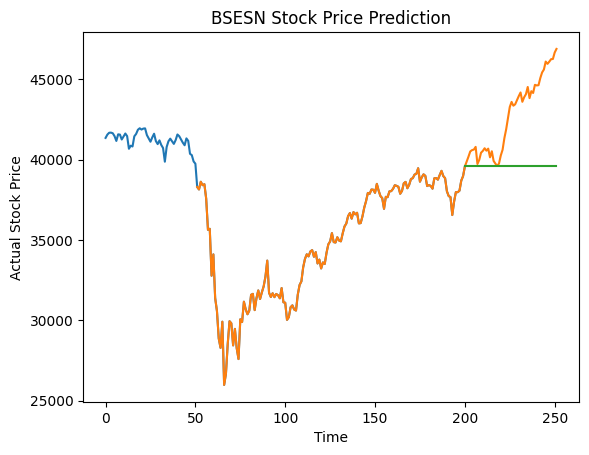

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

# **News Analysis**

In [ ]:
news=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_DataScience/GRIP/StockMarket_NewsAnalysis/india-news-headlines.csv")
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
news.dropna(inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [ ]:
news.shape

(3650970, 3)

In [ ]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [ ]:
news['headline_category'].value_counts()

india                                                    297491
unknown                                                  209583
city.mumbai                                              150451
city.delhi                                               137648
business.india-business                                  121195
                                                          ...  
nepal-india-earthquake.opinion                                8
elections.lok-sabha-elections-2019.tripura.news               8
best-products.home-decor-and-garden.living-room-decor         8
profiles.india-profiles                                       8
pms-us-visit                                                  8
Name: headline_category, Length: 1041, dtype: int64

In [ ]:
news.drop_duplicates()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,2022-03-31,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [ ]:
news['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'sports.football.euro-2021', 'business.markets.ipo',
       'sports.tokyo-olympics.india-in-tokyo'], dtype=object)

In [ ]:
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)
news.duplicated().sum()

0

In [ ]:
news['headline_text'] = news.groupby(['publish_date'])['headline_text'].transform(lambda x: ' '.join(x))
news = news.drop_duplicates(subset=['publish_date', 'headline_text'])
news.reset_index(drop=True, inplace=True)
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,unknown,Powerless north India gropes in the dark Think...
2,2001-01-04,unknown,Claire Danes inks to star in 'It's About Love'...
3,2001-01-05,unknown,Faleiro vows to fight common cadre proposal Te...
4,2001-01-06,unknown,Light combat craft takes India into club class...


In [ ]:
news.shape

(7717, 3)

In [ ]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def preprocess_headline(headline):
    headline = headline.lower()
    headline = re.sub(r'[^a-zA-Z0-9\s]', '', headline)
    words = nltk.word_tokenize(headline)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    cleaned_headline = ' '.join(words)

    return cleaned_headline

news['news'] = news['headline_text'].apply(preprocess_headline)
news

,publish_date,headline_category,headline_text,news
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,statu quo disturb ayodhya say vajpaye fissur h...
1,2001-01-03,unknown,Powerless north India gropes in the dark Think...,powerless north india grope dark think laxman ...
2,2001-01-04,unknown,Claire Danes inks to star in 'It's About Love'...,clair dane ink star love akashdeep ghaath ka s...
3,2001-01-05,unknown,Faleiro vows to fight common cadre proposal Te...,faleiro vow fight common cadr propos telecom t...
4,2001-01-06,unknown,Light combat craft takes India into club class...,light combat craft take india club class hawk ...
...,...,...,...,...
7712,2022-03-27,entertainment.kannada.movies.news,Playing a dead man in Body God meant sitting i...,play dead man bodi god meant sit refriger guru...
7713,2022-03-28,life-style.spotlight,As fashion becomes democratic; demand for styl...,fashion becom democrat demand stylist soar las...
7714,2022-03-29,entertainment.hindi.bollywood,Bobby Deol: Like my dad; I hope to be working ...,bobbi deol like dad hope work age yasha surya ...
7715,2022-03-30,entertainment.kannada.music,I will not give in to trends: Dossmode The tim...,give trend dossmod time gave boyfriend incred ...


In [ ]:
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity, analysis.sentiment.polarity

news[['subjectivity', 'polarity']] = news['news'].apply(lambda x: pd.Series(calculate_sentiment(x)))

news.head()


,publish_date,headline_category,headline_text,news,subjectivity,polarity
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,statu quo disturb ayodhya say vajpaye fissur h...,0.307576,0.157576
1,2001-01-03,unknown,Powerless north India gropes in the dark Think...,powerless north india grope dark think laxman ...,0.450000,0.018182
2,2001-01-04,unknown,Claire Danes inks to star in 'It's About Love'...,clair dane ink star love akashdeep ghaath ka s...,0.467138,0.079504
3,2001-01-05,unknown,Faleiro vows to fight common cadre proposal Te...,faleiro vow fight common cadr propos telecom t...,0.418182,0.279455
4,2001-01-06,unknown,Light combat craft takes India into club class...,light combat craft take india club class hawk ...,0.410909,0.367273


In [ ]:
sia = SentimentIntensityAnalyzer()
def sentiment_scores(text):
  scores=sia.polarity_scores(text)
  return scores['compound'], scores['neg'], scores['neu'],scores['pos']
news[['Compound','Negative','Neutral','Positive']]=news['news'].apply(lambda x: pd.Series(sentiment_scores(x)))
news.head()

,publish_date,headline_category,headline_text,news,subjectivity,polarity,sentiment,Compound,Negative,Neutral,Positive
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,statu quo disturb ayodhya say vajpaye fissur h...,0.307576,0.157576,Positive,-0.9601,0.158,0.750,0.092
1,2001-01-03,unknown,Powerless north India gropes in the dark Think...,powerless north india grope dark think laxman ...,0.450000,0.018182,Positive,0.4019,0.097,0.787,0.116
2,2001-01-04,unknown,Claire Danes inks to star in 'It's About Love'...,clair dane ink star love akashdeep ghaath ka s...,0.467138,0.079504,Positive,0.9538,0.091,0.790,0.120
3,2001-01-05,unknown,Faleiro vows to fight common cadre proposal Te...,faleiro vow fight common cadr propos telecom t...,0.418182,0.279455,Positive,0.7918,0.146,0.687,0.167
4,2001-01-06,unknown,Light combat craft takes India into club class...,light combat craft take india club class hawk ...,0.410909,0.367273,Positive,-0.3182,0.152,0.699,0.148


In [ ]:
news.columns

Index(['publish_date', 'headline_category', 'headline_text', 'news',
       'subjectivity', 'polarity', 'sentiment', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

In [ ]:
header = {
    'publish_date': 'Date',
    'headline_category': 'Category',
    'headline_text':'headline_text',
    'news': 'News',
    'subjectivity':'Subjectivity',
    'polarity':'Polarity',
    'sentiment':'Sentiment',
    'Compound':'Compound',
    'Negative': 'Negative',
    'Neutral':'Neutral',
    'Positive':'Positive'
}

news.rename(columns=header, inplace=True)
news.head()

,Date,Category,headline_text,News,Subjectivity,Polarity,Sentiment,Compound,Negative,Neutral,Positive
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,statu quo disturb ayodhya say vajpaye fissur h...,0.307576,0.157576,Positive,-0.9601,0.158,0.750,0.092
1,2001-01-03,unknown,Powerless north India gropes in the dark Think...,powerless north india grope dark think laxman ...,0.450000,0.018182,Positive,0.4019,0.097,0.787,0.116
2,2001-01-04,unknown,Claire Danes inks to star in 'It's About Love'...,clair dane ink star love akashdeep ghaath ka s...,0.467138,0.079504,Positive,0.9538,0.091,0.790,0.120
3,2001-01-05,unknown,Faleiro vows to fight common cadre proposal Te...,faleiro vow fight common cadr propos telecom t...,0.418182,0.279455,Positive,0.7918,0.146,0.687,0.167
4,2001-01-06,unknown,Light combat craft takes India into club class...,light combat craft take india club class hawk ...,0.410909,0.367273,Positive,-0.3182,0.152,0.699,0.148


# **Making Hybrid Model**

In [ ]:
merged_data = pd.merge(stock, news, on='Date', how='inner')
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Moving_Average_10,Moving_Average_50,...,Category,headline_text,News,Subjectivity,Polarity,Sentiment,Compound,Negative,Neutral,Positive
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,NaN,NaN,NaN,...,city.bhubaneswar,After Jagannath Temple; Puri beach devpt plan ...,jagannath templ puri beach devpt plan of chao ...,0.360731,0.047937,Positive,-0.9999,0.162,0.773,0.065
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,0.004991,NaN,NaN,...,india,What is Citizenship (Amendment) Bill 2019: All...,citizenship amend bill 2019 need know rs 1000 ...,0.344638,0.051881,Positive,-0.9998,0.136,0.796,0.068
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,0.002776,NaN,NaN,...,city.ahmedabad,Only 61% of CCA covered after revamp of canals...,61 cca cover revamp canal cag perform bengalur...,0.341071,0.042132,Positive,-0.9998,0.143,0.790,0.067
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,0.000183,NaN,NaN,...,entertainment.hindi.bollywood,I'm done playing the good girl; I want to be a...,im done play good girl want baddi amrita rao b...,0.346173,0.036523,Positive,-0.9999,0.144,0.796,0.061
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,-0.000933,NaN,NaN,...,astrology.horoscope,Weekly Horoscope; December 22-28: Check predic...,weekli horoscop decemb 2228 check predict zodi...,0.415914,0.054551,Positive,-0.9995,0.138,0.774,0.088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0,0.003027,45233.326953,42105.286250,...,life-style.relationships.love-sex,Ways to get you in the mood for sex when you'r...,way get mood sex your realli feel crackdown no...,0.391889,0.087054,Positive,-0.9998,0.137,0.791,0.072
246,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0,0.003350,45443.701172,42268.996875,...,business.india-business,No threat from Covid claims to balance sheets ...,threat covid claim balanc sheet petrol would r...,0.330728,0.078706,Positive,-0.9996,0.121,0.805,0.075
247,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0,0.000210,45604.474219,42420.319297,...,city.nagpur,1;147 RT-PCR tests in a day; only 3 found +ve ...,1147 rtpcr test day 3 found akola pay compens ...,0.357476,0.081041,Positive,-0.9997,0.127,0.798,0.076
248,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0,0.008717,45809.316406,42574.174531,...,tv.news.hindi,Asmita Sood's favourite holiday destinations a...,asmita sood favourit holiday destin everi trav...,0.407501,0.069565,Positive,-0.9997,0.124,0.805,0.072


In [ ]:
df = merged_data[['Close','Subjectivity', 'Polarity', 'Compound','Negative','Neutral','Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,41352.171875,0.360731,0.047937,-0.9999,0.162,0.773,0.065
1,41558.570313,0.344638,0.051881,-0.9998,0.136,0.796,0.068
2,41673.921875,0.341071,0.042132,-0.9998,0.143,0.790,0.067
3,41681.539063,0.346173,0.036523,-0.9999,0.144,0.796,0.061
4,41642.660156,0.415914,0.054551,-0.9995,0.138,0.774,0.088
...,...,...,...,...,...,...,...
245,46099.011719,0.391889,0.087054,-0.9998,0.137,0.791,0.072
246,46253.460938,0.330728,0.078706,-0.9996,0.121,0.805,0.075
247,46263.171875,0.357476,0.081041,-0.9997,0.127,0.798,0.076
248,46666.460938,0.407501,0.069565,-0.9997,0.124,0.805,0.072


In [ ]:
ms = MinMaxScaler()
merged = pd.DataFrame(ms.fit_transform(df))
merged.columns = df.columns
merged.index = df.index
merged.head()


,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.735131,0.411077,0.311671,0.000000,0.814433,0.183673,0.300000
1,0.745002,0.292742,0.335389,0.000394,0.546392,0.418367,0.350000
2,0.750519,0.266514,0.276752,0.000394,0.618557,0.357143,0.333333
3,0.750884,0.304031,0.243020,0.000000,0.628866,0.418367,0.233333
4,0.749024,0.816845,0.351445,0.001574,0.567010,0.193878,0.683333


In [ ]:
X = merged.drop('Close', axis=1)
y =merged['Close']
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'AdaBoost': AdaBoostRegressor(),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

mse_scores = {}
mae_scores = {}
r2_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores[model_name] = mse
    mae_scores[model_name] = mae
    r2_scores[model_name] = r2

for model_name in models.keys():
    print(f'{model_name} Metrics:')
    print(f'Mean Squared Error: {mse_scores[model_name]}')
    print(f'Mean Absolute Error: {mae_scores[model_name]}')
    print(f'R-squared: {r2_scores[model_name]}')
    print()


Random Forest Metrics:
Mean Squared Error: 0.09369947992721388
Mean Absolute Error: 0.2564109254478318
R-squared: -6.5021976891617195

KNN Metrics:
Mean Squared Error: 0.09738742060715272
Mean Absolute Error: 0.2616037825095041
R-squared: -6.797478517489635

AdaBoost Metrics:
Mean Squared Error: 0.0983559829667463
Mean Absolute Error: 0.2841255654505139
R-squared: -6.875028001239135

Linear Regression Metrics:
Mean Squared Error: 0.08680831665929256
Mean Absolute Error: 0.25661366670889135
R-squared: -5.950445756446668

XGBoost Metrics:
Mean Squared Error: 0.09812103095082128
Mean Absolute Error: 0.2617704572499347
R-squared: -6.856216194895003



**Linear Regression Model gives the best prediction with less Mean Squared Error**